## Intuitive Working

1. Select **K** random points.
2. Calculate the centroid for all the points and assign points to the closest centroid.
3. Repeat until convergence.

### Random Initialization Problem

- Random initialization doesn't always work.
- To solve this problem, use **KMeans++**.

### Selecting Number of Clusters (Elbow Method)

- **Within Cluster Sum of Squares (WCSS)** is the sum of squares of the distance of every point to the nearest cluster.
- Initially, WCSS will be very high and then it will lower and lower, eventually reaching 0.
- We need to decide the best value of **K** depending on the slope obtained by increasing the number of clusters.
- If at a point, increasing the number of clusters doesn't decrease WCSS substantially, then that's the ideal number of clusters.

**In short:** We're maximizing the second derivative of WCSS.


In [2]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import pandas as pd  # For data manipulation and analysis

# Loading the dataset
df = pd.read_csv('Mall_Customers.csv')  # Reading the CSV file into a DataFrame

# Selecting the features for clustering
# Here, we are selecting the 4th and 5th columns (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values  # Extracting the values of the selected columns

# Displaying the first few rows of the dataset to understand its structure
df.head()  # This will print the first 5 rows of the DataFrame


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

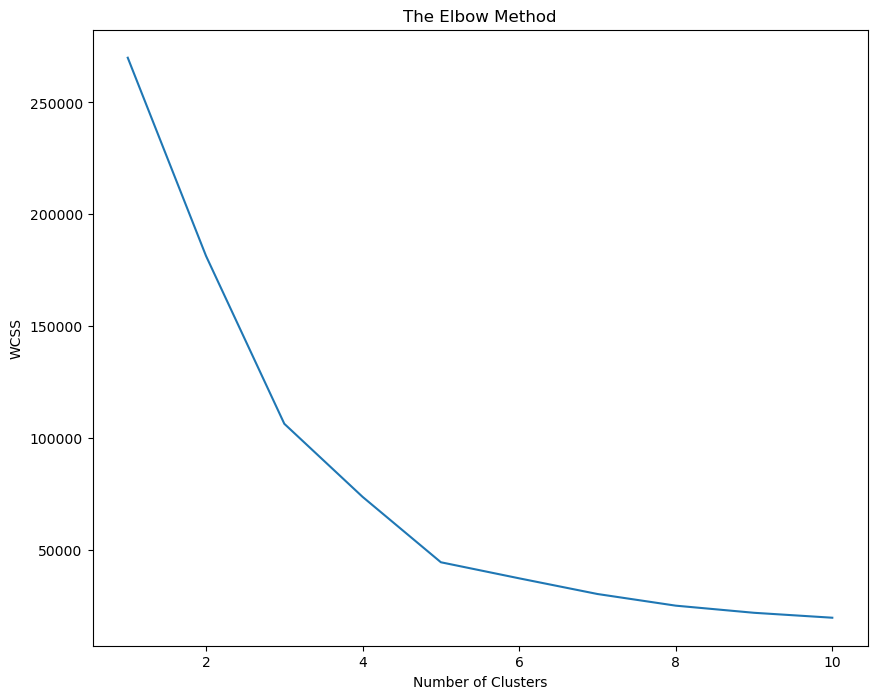

In [3]:
# Importing the KMeans class from sklearn.cluster
from sklearn.cluster import KMeans

# Creating a figure for the plot with a specified size
fig = plt.figure(figsize=(10, 8))

# Initializing an empty list to store Within-Cluster Sum of Squares (WCSS) values
WCSS = []

# Looping over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Initializing the KMeans algorithm with the current number of clusters (i)
    # init='k-means++' ensures smart initialization to speed up convergence
    # max_iter=300 sets the maximum number of iterations for a single run
    # n_init=10 specifies the number of times the algorithm will be run with different centroid seeds
    # random_state=0 ensures reproducibility of the results
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fitting the KMeans algorithm to the data
    clf.fit(X)
    
    # Appending the WCSS (inertia) of the current clustering to the list
    WCSS.append(clf.inertia_)  # inertia is another name for WCSS

# Plotting the WCSS values against the number of clusters
plt.plot(range(1, 11), WCSS)

# Adding a title to the plot
plt.title('The Elbow Method')

# Labeling the y-axis
plt.ylabel('WCSS')

# Labeling the x-axis
plt.xlabel('Number of Clusters')

# Displaying the plot
plt.show()


C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


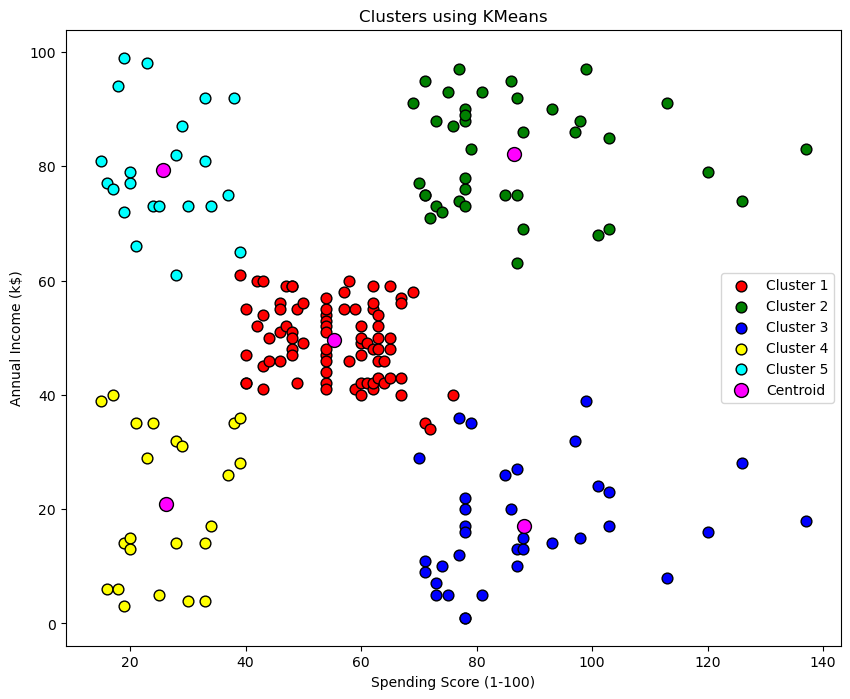

In [4]:
# Importing the KMeans class from sklearn.cluster
from sklearn.cluster import KMeans

# Initializing the KMeans algorithm with 5 clusters
# init='k-means++' ensures smart initialization to speed up convergence
# max_iter=300 sets the maximum number of iterations for a single run
# n_init=10 specifies the number of times the algorithm will be run with different centroid seeds
# random_state=0 ensures reproducibility of the results
clf = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fitting the KMeans algorithm to the data and predicting the cluster for each data point
y_kmeans = clf.fit_predict(X)

# Creating a figure for the plot with a specified size
fig = plt.figure(figsize=(10, 8))

# Plotting the data points and coloring them according to their cluster
# Each cluster is plotted with a different color and label
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue', s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')

# Plotting the centroids of the clusters
# The centroids are plotted with a different color and larger size
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid', edgecolors='black')

# Adding a legend to the plot
plt.legend()

# Adding a title to the plot
plt.title('Clusters using KMeans')

# Labeling the y-axis
plt.ylabel('Annual Income (k$)')

# Labeling the x-axis
plt.xlabel('Spending Score (1-100)')

# Displaying the plot
plt.show()
